In [ ]:
#!pip install --upgrade tensorflow==1.15

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import math
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('Mall_Customers.csv')
print(data)
df = pd.DataFrame(data)
df['Genre'] = pd.to_numeric(df['Genre'],errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['Genre'] = df['Genre'].astype(int)
print(df)


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      0   19 

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.mean()

CustomerID                100.50
Genre                       0.00
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

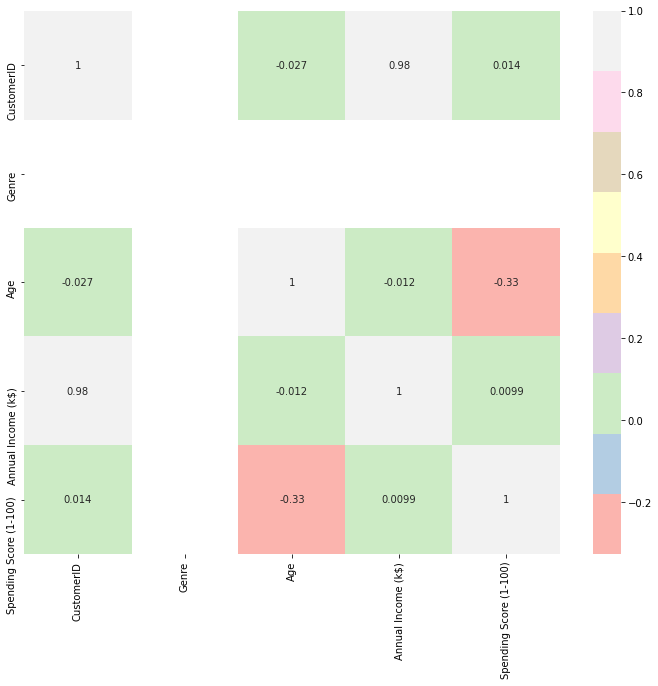

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Pastel1)
plt.show()
df.drop('Genre', axis='columns', inplace=True)

Dari hasil matrix diatas maka dapat dilihat bahwa angka dari >0 sampai 1 adalah nilai korelasi dengan spending score dimana semakin dekat dengan angka 1 semakin besar positive korelasi dengan target sedangkan jika <0 sampai -1 adalah niali korelasi dimana semakin dekat dengan angka -1 maka semakin besar negative korelasi dengan target dan jika 0 maka tidak ada korelasi sama sekali. dari data diatas dapat dilihat bahwa collumn CustomerID dan Annual Income memiliki korelasi positive terhadapt Spending score sedangkan collumn Age memiliki korelasi negative terhadap spending score dan collumn genre tidak memiliki korelasi sama sekali dengan spending score. oleh karena itu kita nanti akan mendrop collumn Genre

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Spending Score (1-100)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

CustomerID                0.013835
Age                       0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

Dari hasil diatas dapat dilihat bahwa Age memiliki korelasi terbesar terhadap spending score, lalu diikuti oleh CustomerID dan Annual Income sedangkan untuk Genre tidak memiliki korelasi sama sekali.

In [ ]:
print(data[["CustomerID","Age"]].corr())
print(data[["Annual Income (k$)","Age"]].corr())

df.drop('CustomerID', axis='columns', inplace=True)

            CustomerID       Age
CustomerID    1.000000 -0.026763
Age          -0.026763  1.000000
                    Annual Income (k$)       Age
Annual Income (k$)            1.000000 -0.012398
Age                          -0.012398  1.000000


Dari data diatas kita dapat lihat bahwa korelasi antara sesama independent variable juga berimpact terhadap permodelan linear regression nantinya oleh karena itu lebih baik jika sesama linear independent variable untuk tidak memiliki korelasi yang tinggi 1 sama yang lain. Dari data diatas kita dapat melihat bahwa karena collumn Age memiliki korelasi terbesar dengan target maka kita harus menjadikan collumn Age menjadi patokan lalu dibandingkan dengan collumn independent lainnya. Dari data kita dapat bahwa Annual Income memiliki korelasi dengan Age lebih kecil daripada CustomerID oleh karena itu kita akan mendrop collumn customerID dan mengambil Annual Income dan Age.

In [ ]:
cols = df.columns
features = df[cols[0:-1]].values
label = df[cols[-1]].values
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
print('Training Set Features:\n', x_train)
print('\nTraining Set Labels:\n',y_train)

Training Set Features:
 [[ 68  63]
 [ 54  63]
 [ 36 103]
 [ 37  20]
 [ 51  44]
 [ 35  23]
 [ 18  65]
 [ 20  37]
 [ 30  99]
 [ 23  70]
 [ 48  61]
 [ 39  69]
 [ 50  67]
 [ 59  43]
 [ 18  33]
 [ 35  93]
 [ 32  97]
 [ 66  63]
 [ 30 137]
 [ 19  74]
 [ 63  65]
 [ 68  48]
 [ 23  54]
 [ 48  39]
 [ 20  21]
 [ 22  17]
 [ 40  71]
 [ 21  62]
 [ 29  40]
 [ 43  48]
 [ 50  43]
 [ 21  54]
 [ 29  98]
 [ 34  78]
 [ 42  86]
 [ 19  64]
 [ 58  20]
 [ 49  65]
 [ 40  60]
 [ 27  67]
 [ 47  78]
 [ 68  59]
 [ 38  54]
 [ 40  69]
 [ 32 103]
 [ 24  20]
 [ 67  54]
 [ 25  72]
 [ 28 101]
 [ 24  39]
 [ 20  61]
 [ 42  34]
 [ 29  79]
 [ 54 101]
 [ 38  78]
 [ 26  62]
 [ 35 120]
 [ 32 126]
 [ 34  78]
 [ 36  87]
 [ 26  54]
 [ 25  24]
 [ 18  59]
 [ 44  78]
 [ 20  16]
 [ 70  49]
 [ 48  54]
 [ 43  78]
 [ 35  18]
 [ 38  64]
 [ 19  15]
 [ 27  78]
 [ 40  54]
 [ 18  48]
 [ 47  43]
 [ 33  86]
 [ 34  58]
 [ 47  71]
 [ 50  40]
 [ 67  47]
 [ 59  54]
 [ 48  60]
 [ 32  77]
 [ 56  79]
 [ 32  76]
 [ 22  57]
 [ 37  97]
 [ 28  77]
 [ 50  8

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Disini kita sudah memasukkan semua training datanya ke dalam model LinearRegression

In [ ]:
y_pred = lr.predict(x_test)
print('Data Prediction:\n', y_pred)
print('Data Aktual:\n' , y_test)
print('Accuracy:\n',lr.score(x_train, y_train))
sort_x = sorted(x_test, key=lambda x: x[0], reverse=True)

Data Prediction:
 [57.61169526 33.96772858 43.39971445 34.25062373 52.39975856 60.25770081
 60.31439721 53.36183678 58.98467266 54.69448357 59.56682874 40.94717608
 51.05074598 44.35419363 35.53125091 44.30801852 57.78587441 60.45292253
 48.9465659  41.77657348 53.70727282 51.17582777 43.77495981 55.44205204
 60.26529985 64.67297169 51.56743891 48.63093919 55.1024605  51.61361402
 57.23644991 54.56940179 50.05885844 60.23841278 41.35807526 58.48726777
 45.01233413 37.76343503 54.69156132 54.69448357]
Data Aktual:
 [51 35 14 59 39 18 52 40 87 27 75 29 99 46 52 43 73 81  7 46 60 35 28 42
 73  5 26 31 91 61 47 75 16 69 15 50 13 56 47 10]
Accuracy:
 0.11504970689968541


Tujuan dari sort x diatas adalah agar nantinya ketika ingin dibuat grafik garis grafiknya tidak jelek atau timpa menimpa karena data yang tidak kesort.

In [ ]:
temp = []
for i in sort_x:
  temp.append(i[0])
y_pred1 = lr.predict(sort_x)

Temp ini berfungsi untuk menyimpan 1 column pada bagian xnya yaitu column Age karena memiliki corelasi paling besar dengan column target. Sedangkan untuk y_pred bertujuan untuk menyimpan nilai dari hasil prediksi dengan x yang sudah ke sort.

In [ ]:
Coef = np.corrcoef(x_train, x_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print(f'Coefficient :\n {Coef}')
print(f'MSE : {MSE:.2f}')
print(f'MAE : {MAE:.2f}')
print(f'RMSE : {RMSE:.2f}')

Coefficient :
 [[ 1. -1. -1. ...  1. -1. -1.]
 [-1.  1.  1. ... -1.  1.  1.]
 [-1.  1.  1. ... -1.  1.  1.]
 ...
 [ 1. -1. -1. ...  1. -1. -1.]
 [-1.  1.  1. ... -1.  1.  1.]
 [-1.  1.  1. ... -1.  1.  1.]]
MSE : 585.20
MAE : 19.88
RMSE : 24.19


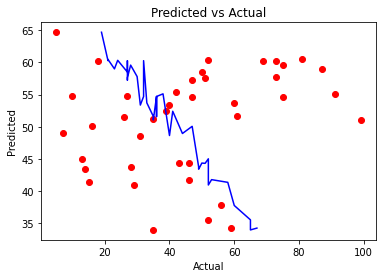

In [ ]:
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(temp, y_pred1, color ='blue')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()